<a href="https://colab.research.google.com/github/anujshetty/SearchAndResQ/blob/main/Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [249]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

from Gridworld import Gridworld
from utils import visualize_grid, policy_score, simulate_policy
from __future__ import unicode_literals
from Learning import QLearning, EpsilonGreedyExploration, FixedPolicy


(20, 20, 4, 3, 3, 3, 6)
[16, 12, 1, 0, 0, 0]


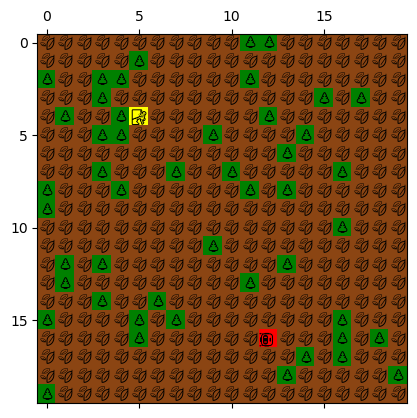

In [250]:
g_rand = Gridworld(gridworld_length=20, gridworld_width=20, num_obstacles=50,
                 collisionReward= -1, destinationReward= 5, defaultReward= 0, outOfBoundsReward = -1, 
                 failChance= 0, gamma= 1)
eps_greedy_policy =  EpsilonGreedyExploration(0.6, alpha=0.9)
qlearning_model = QLearning(g_rand, 0.2)
print(qlearning_model.Q.shape)
visualize_grid(g_rand)
print(g_rand.state)

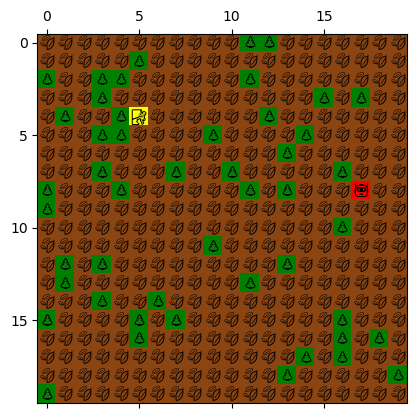

In [251]:
g_rand.reset_position()
visualize_grid(g_rand)

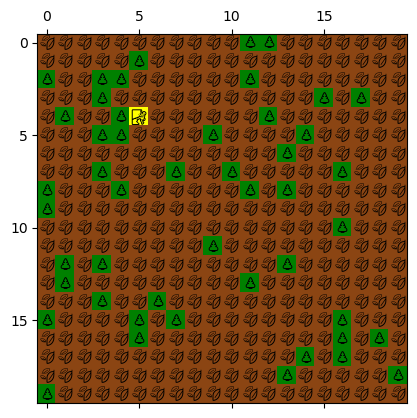

In [252]:
for i in range(100000):
    g_rand.reset_position()
    simulate_policy(g_rand, policy_type="epsilon-greedy", model=qlearning_model, policy=eps_greedy_policy, 
                    run_to_completion=False, num_iters=50, visualize=False)
visualize_grid(g_rand)

In [253]:
learned_policy = FixedPolicy(qlearning_model.extract_policy(), g_rand,qlearning_model)
print(learned_policy.policy)
#print(qlearning_model.Q)

[[[[[[4 1 0]
     [1 1 0]
     [0 0 0]]

    [[1 1 0]
     [1 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[1 1 0]
     [1 1 0]
     [0 0 0]]

    [[1 1 0]
     [1 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[5 1 0]
     [4 1 0]
     [0 0 0]]

    [[1 0 0]
     [1 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[5 1 0]
     [1 1 0]
     [0 0 0]]

    [[1 1 0]
     [1 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]]



  [[[[1 1 0]
     [2 1 0]
     [0 0 0]]

    [[1 1 0]
     [1 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[1 1 0]
     [1 1 0]
     [0 0 0]]

    [[1 1 0]
     [1 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[3 1 0]
     [1 1 0]
     [0 0 0]]

    [[1 0 0]
     [1 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[4 1 0]
     [4 1 0]
     [0 0 0]]

    [[1 1 0]
     [1 0 0]
     [0 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]]]

In [243]:
# reset agent position in existing grid
g_rand.reset_position()

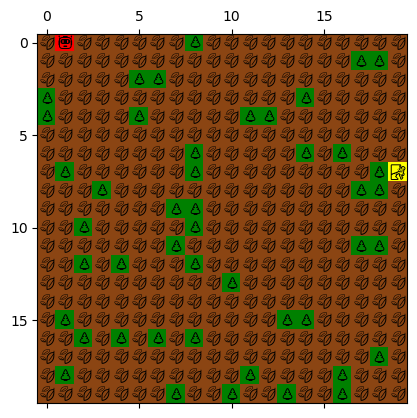

In [244]:
visualize_grid(g_rand)

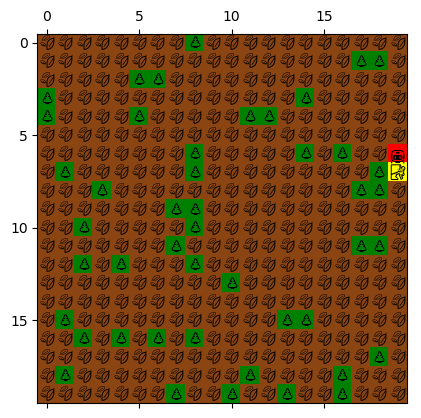

In [245]:
policy_score_learned = simulate_policy(g_rand, policy_type="fixed", model=None, policy=learned_policy, run_to_completion=True)

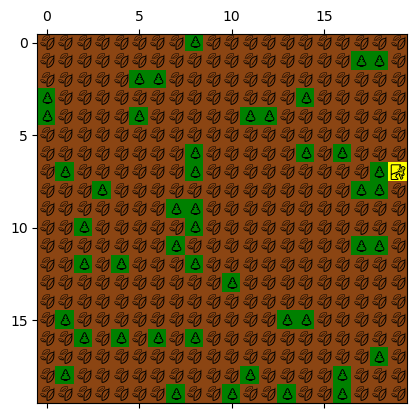

In [246]:
visualize_grid(g_rand)

In [247]:
print(policy_score_learned)

5
